In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


Loading Data

In [ ]:
daily_activity= pd.read_csv('/content/drive/MyDrive/PrepInsta/Week 8/2. Cleaned Data/DailyActivity.csv')
hourly_activity=pd.read_csv('/content/drive/MyDrive/PrepInsta/Week 8/2. Cleaned Data/HourlyActivity.csv')
sleep_day=pd.read_csv('/content/drive/MyDrive/PrepInsta/Week 8/2. Cleaned Data/SleepDay.csv')
weight_log=pd.read_csv('/content/drive/MyDrive/PrepInsta/Week 8/2. Cleaned Data/WeightLog.csv')
heartrate_seconds=pd.read_csv('/content/drive/MyDrive/PrepInsta/Week 8/2. Cleaned Data/HeartrateSeconds.csv')

Daily Activity

In [ ]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


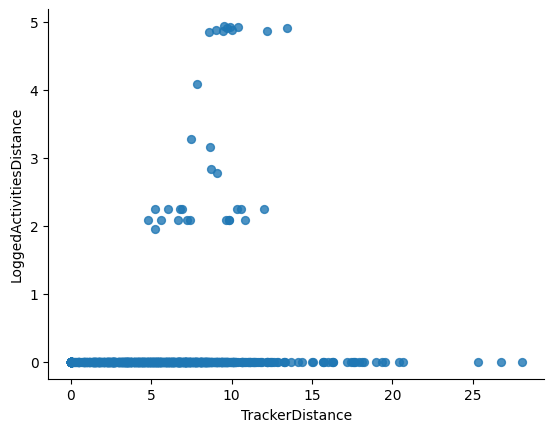

In [ ]:
from matplotlib import pyplot as plt
daily_activity.plot(kind='scatter', x='TrackerDistance', y='LoggedActivitiesDistance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

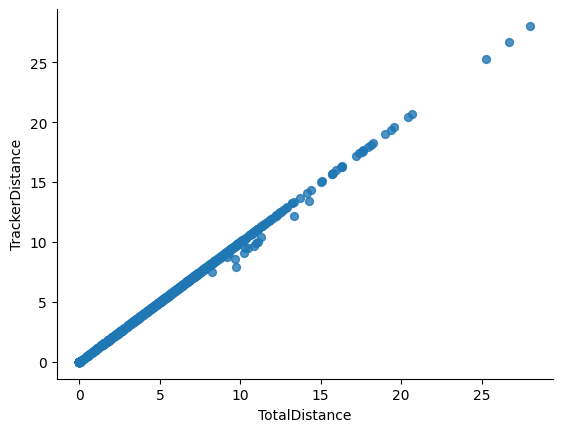

In [ ]:
from matplotlib import pyplot as plt
daily_activity.plot(kind='scatter', x='TotalDistance', y='TrackerDistance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

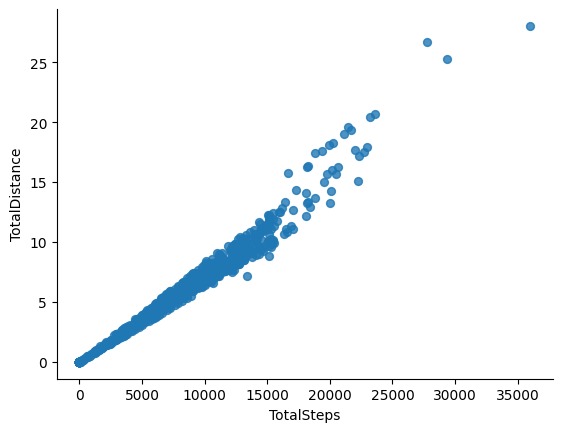

In [ ]:
from matplotlib import pyplot as plt
daily_activity.plot(kind='scatter', x='TotalSteps', y='TotalDistance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

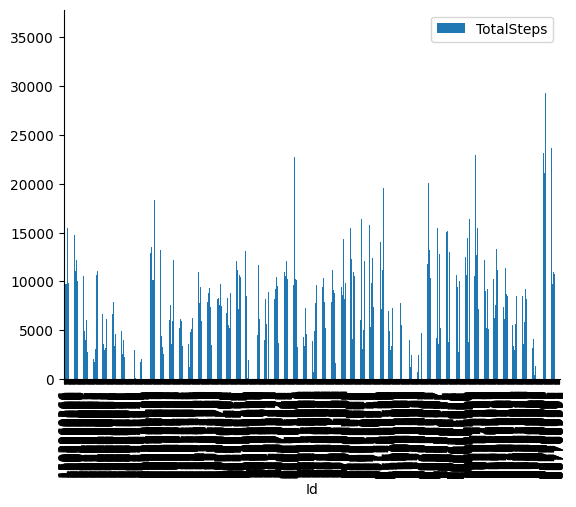

In [ ]:
from matplotlib import pyplot as plt
daily_activity.plot(kind='bar', x='Id', y='TotalSteps')
plt.gca().spines[['top', 'right',]].set_visible(False)

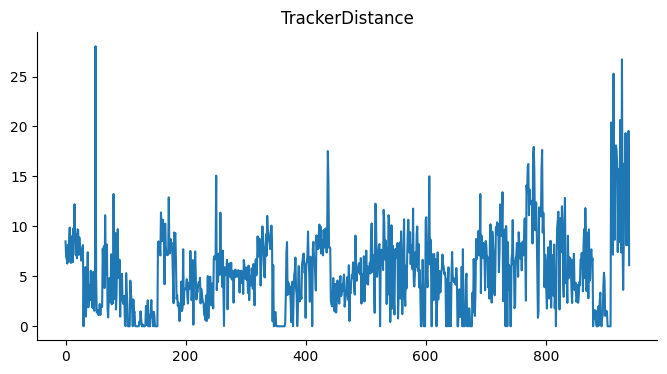

In [ ]:
from matplotlib import pyplot as plt
daily_activity['TrackerDistance'].plot(kind='line', figsize=(8, 4), title='TrackerDistance')
plt.gca().spines[['top', 'right']].set_visible(False)

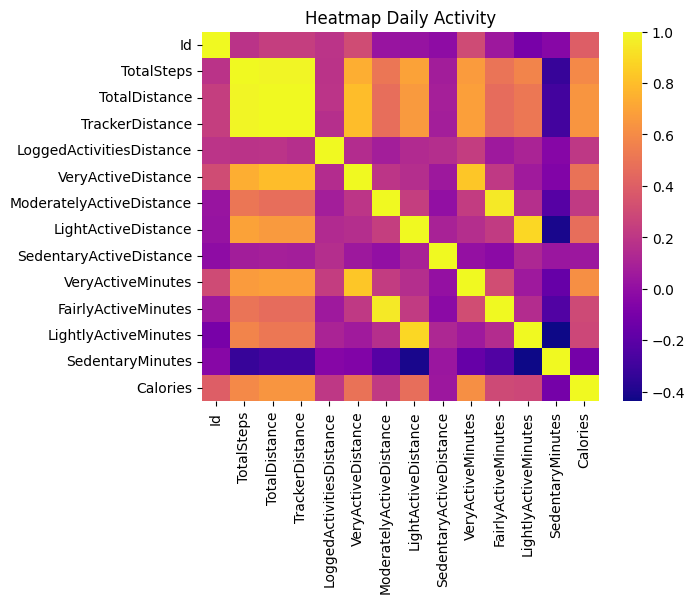

In [ ]:
sns.heatmap(daily_activity.drop('ActivityDate', axis=1).corr(), cmap='plasma')

# Set the title
plt.title('Heatmap Daily Activity')

# Show the plot
plt.show()

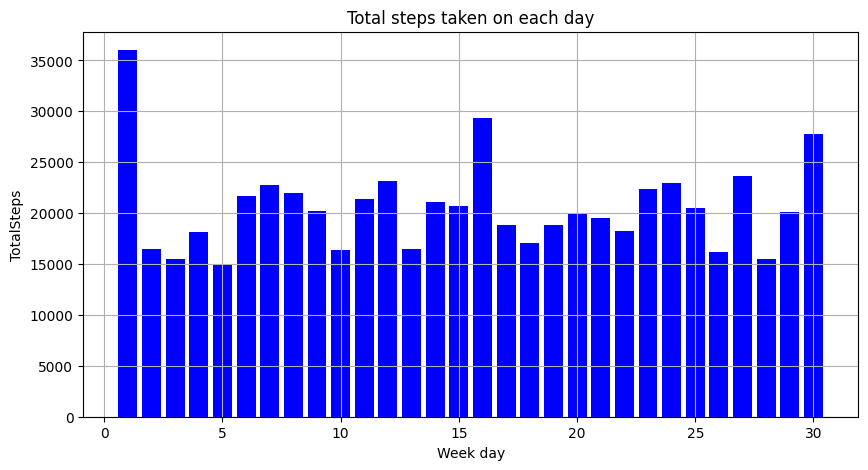

In [ ]:
daily_activity['day'] = daily_activity['ActivityDate'].apply(lambda x: int(x.split('-')[2]))

fig,ax =plt.subplots(figsize=(10,5))
plt.bar(daily_activity['day'],daily_activity.TotalSteps, color='Blue')
plt.xlabel("Week day")
plt.ylabel('TotalSteps')
plt.title('Total steps taken on each day')
plt.grid()
plt.show()

User who ran the most

In [ ]:
temp=daily_activity.groupby('Id')['TotalDistance'].sum()
temp.idxmax(),temp.max()

(8877689391, 409.59999728202826)

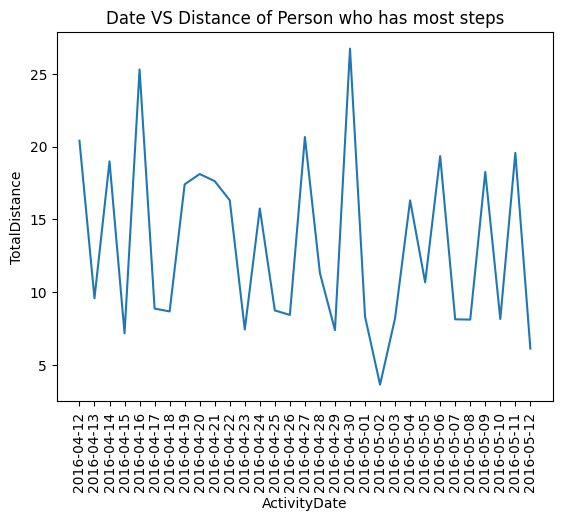

In [ ]:
temp=daily_activity.loc[daily_activity['Id']==8877689391].set_index('ActivityDate')
sns.lineplot(data=temp, x=temp.index, y='TotalDistance')

# Optionally, set labels and title
plt.xlabel('ActivityDate')
plt.ylabel('TotalDistance')
plt.title('Date VS Distance of Person who has most steps')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

User who burned the most calories

In [ ]:
temp=daily_activity.groupby('Id')['Calories'].sum()
temp.idxmax(),temp.max()

(8378563200, 106534)

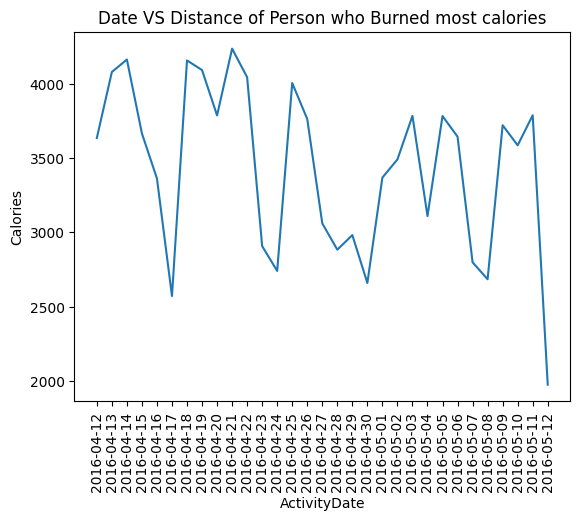

In [ ]:
temp=daily_activity.loc[daily_activity['Id']==8378563200].set_index('ActivityDate')
sns.lineplot(data=temp, x=temp.index, y='Calories')

# Optionally, set labels and title
plt.xlabel('ActivityDate')
plt.ylabel('Calories')
plt.title('Date VS Distance of Person who Burned most calories')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Hourly Activity

In [ ]:
hourly_activity

,Id,ActivityHour,Calories,StepTotal
0,1503960366,2016-04-12 00:00:00,81,373
1,1503960366,2016-04-12 01:00:00,61,160
2,1503960366,2016-04-12 02:00:00,59,151
3,1503960366,2016-04-12 03:00:00,47,0
4,1503960366,2016-04-12 04:00:00,48,0
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,126,514
22095,8877689391,2016-05-12 11:00:00,192,1407
22096,8877689391,2016-05-12 12:00:00,321,3135
22097,8877689391,2016-05-12 13:00:00,101,307


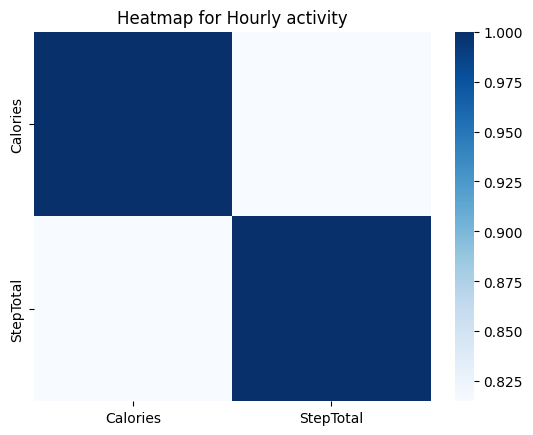

In [ ]:
sns.heatmap(hourly_activity.drop(['ActivityHour','Id'], axis=1).corr(), cmap='Blues')

# Set the title
plt.title('Heatmap for Hourly activity')

# Show the plot
plt.show()

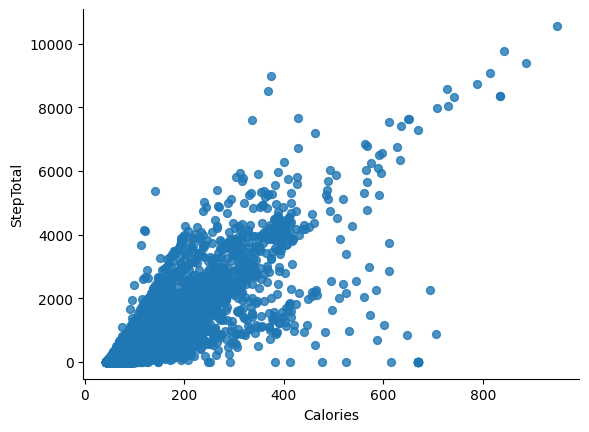

In [ ]:
from matplotlib import pyplot as plt
hourly_activity.plot(kind='scatter', x='Calories', y='StepTotal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

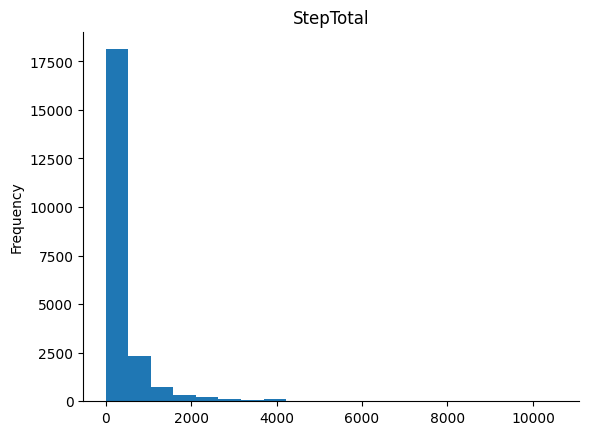

In [ ]:
from matplotlib import pyplot as plt
hourly_activity['StepTotal'].plot(kind='hist', bins=20, title='StepTotal')
plt.gca().spines[['top', 'right',]].set_visible(False)

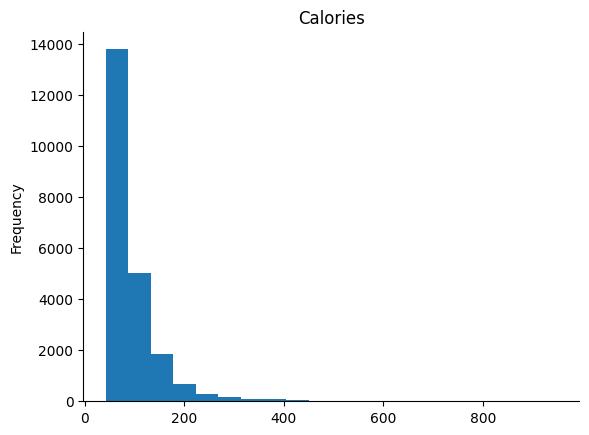

In [ ]:
from matplotlib import pyplot as plt
hourly_activity['Calories'].plot(kind='hist', bins=20, title='Calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

Person with most calories burned

In [ ]:
temp=hourly_activity.groupby('Id')['Calories'].sum()
temp.idxmax(),temp.max()

(8378563200, 106427)

In [ ]:
import plotly.express as px

temp = hourly_activity.loc[hourly_activity['Id'] == 8378563200].set_index('ActivityHour')

temp.reset_index(inplace=True)

temp['ActivityHour'] = pd.to_datetime(temp['ActivityHour'])

fig = px.line(temp, x='ActivityHour', y='Calories')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()

Person with Most steps

In [ ]:
temp=hourly_activity.groupby('Id')['StepTotal'].sum()
temp.idxmax(),temp.max()

(8877689391, 495623)

In [ ]:
temp = hourly_activity.loc[hourly_activity['Id'] == 8877689391].set_index('ActivityHour')

temp.reset_index(inplace=True)

temp['ActivityHour'] = pd.to_datetime(temp['ActivityHour'])

fig = px.line(temp, x='ActivityHour', y='StepTotal')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()

Sleep Day

In [ ]:
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360
409,8792009665,2016-05-01,1,503,527
410,8792009665,2016-05-02,1,415,423
411,8792009665,2016-05-03,1,516,545


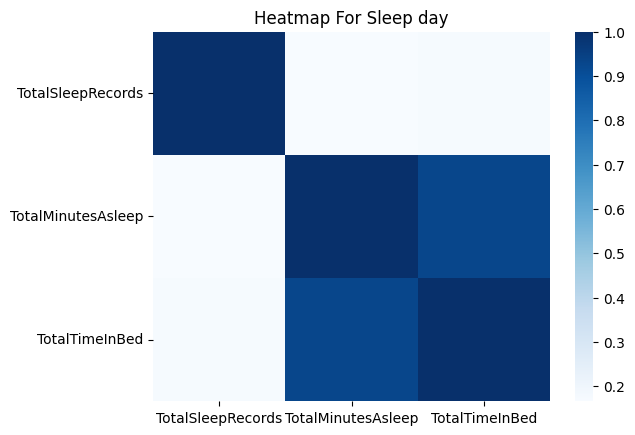

In [ ]:
sns.heatmap(sleep_day.drop(['SleepDay','Id'], axis=1).corr(), cmap='Blues')

# Set the title
plt.title('Heatmap For Sleep day')

# Show the plot
plt.show()

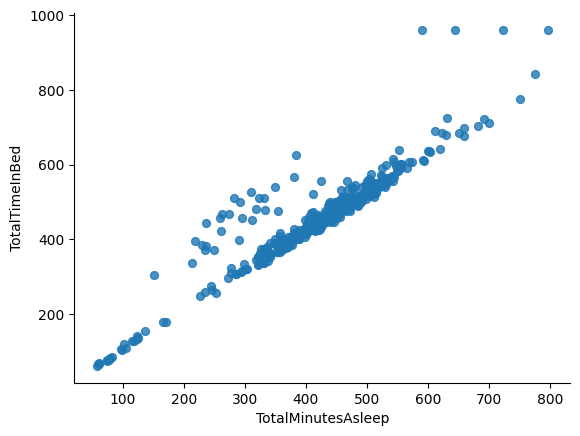

In [ ]:
from matplotlib import pyplot as plt
sleep_day.plot(kind='scatter', x='TotalMinutesAsleep', y='TotalTimeInBed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Person who slept most

In [ ]:
temp=sleep_day.groupby('Id')['TotalMinutesAsleep'].sum()
temp.idxmax(),temp.max()

(5553957443, 14368)

In [ ]:
temp = sleep_day.loc[sleep_day['Id'] == 5553957443].set_index('SleepDay')

temp.reset_index(inplace=True)

temp['SleepDay'] = pd.to_datetime(temp['SleepDay'])

fig = px.line(temp, x='SleepDay', y='TotalMinutesAsleep')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()

Weight Log

In [ ]:
weight_log

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000
...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,25.440001,False,1462517015000
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,25.559999,False,1462692953000
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,25.610001,False,1462775984000
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,25.559999,False,1462949507000


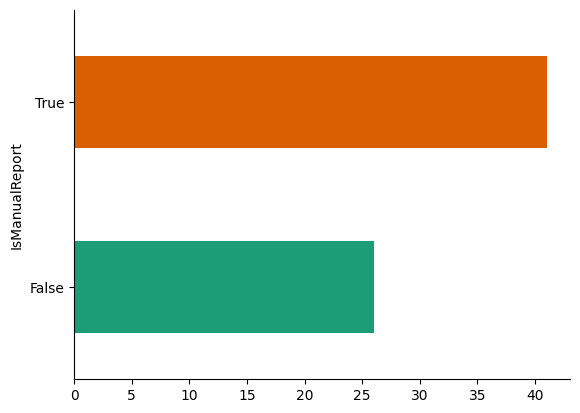

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
weight_log.groupby('IsManualReport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

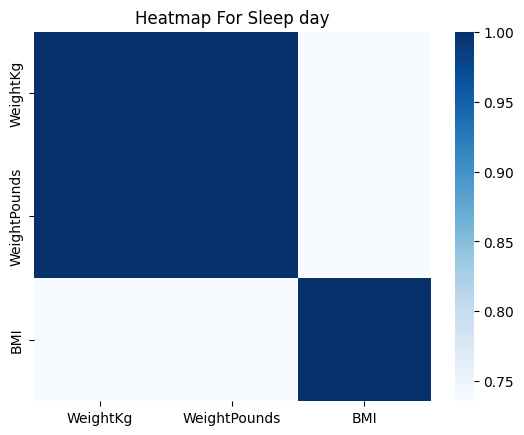

In [ ]:
sns.heatmap(weight_log.drop(['Date','Id','LogId','IsManualReport'], axis=1).corr(), cmap='Blues')

# Set the title
plt.title('Heatmap For Sleep day')

# Show the plot
plt.show()

In [ ]:
temp=weight_log.groupby('Id')['WeightKg']
temp.idxmax(),temp.max()

(Id
 1503960366     0
 1927972279     2
 2873212765     4
 4319703577     5
 4558609924     8
 5577150313    12
 6962181067    13
 8877689391    43
 Name: WeightKg, dtype: int64,
 Id
 1503960366     52.599998
 1927972279    133.500000
 2873212765     57.299999
 4319703577     72.400002
 4558609924     70.300003
 5577150313     90.699997
 6962181067     62.500000
 8877689391     85.800003
 Name: WeightKg, dtype: float64)

In [ ]:
temp = weight_log.loc[weight_log['Id'] == 8877689391].set_index('Date')

temp.reset_index(inplace=True)

temp['date'] = pd.to_datetime(temp['Date'])

fig = px.line(temp, x='date', y='WeightKg')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()

HeartRate Seconds

In [ ]:
heartrate_seconds

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101
...,...,...,...
2483653,8877689391,2016-05-12 14:43:53,57
2483654,8877689391,2016-05-12 14:43:58,56
2483655,8877689391,2016-05-12 14:44:03,55
2483656,8877689391,2016-05-12 14:44:18,55


In [ ]:
temp=heartrate_seconds.groupby('Id')['Value']
temp.idxmax(),temp.max()

(Id
 2022484408      49261
 2026352035     154784
 2347167796     225114
 4020332650     353818
 4388161847     763506
 4558609924    1009362
 5553957443    1236440
 5577150313    1362921
 6117666160    1652708
 6775888955    1716817
 6962181067    1978989
 7007744171    2126583
 8792009665    2211597
 8877689391    2477711
 Name: Value, dtype: int64,
 Id
 2022484408    203
 2026352035    125
 2347167796    195
 4020332650    191
 4388161847    180
 4558609924    199
 5553957443    165
 5577150313    174
 6117666160    189
 6775888955    177
 6962181067    184
 7007744171    166
 8792009665    158
 8877689391    180
 Name: Value, dtype: int64)

In [ ]:
temp = heartrate_seconds.loc[heartrate_seconds['Id'] == 2022484408].set_index('Time')

temp.reset_index(inplace=True)

temp['Time'] = pd.to_datetime(temp['Time'])

fig = px.line(temp, x='Time', y='Value')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1h", step="hour", stepmode="backward"),
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Analysis Of the data


1. Optimizing Advertising: Our analysis reveals a notable dip in user activity between 8 p.m. and 10 p.m., suggesting an opportune moment for Health Trackers Inc. to fine-tune advertising efforts. By leveraging tools like Google AdWords' ad scheduling feature, we can strategically target our audience during peak engagement hours, maximizing the impact of our advertising campaigns while optimizing costs.

2. Enhancing User Engagement: While acquiring new members is crucial, retaining them is equally vital. Studies indicate a significant churn rate among subscription members within the first two years. To address this, FitBit should focus on delivering personalized content that adds tangible value to our users' fitness journey. Our data underscores a positive correlation between daily steps and calorie expenditure, offering a prime opportunity to provide tailored insights and actionable tips to keep users engaged and motivated.

3. Promoting Active Lifestyles: Overcoming the challenge of reaching the recommended 10,000 daily steps for adults requires proactive measures. Health Trackers Inc. can drive user engagement by offering compelling tips and challenges designed to help users meet their daily fitness goals. By regularly sharing informative content on our website and incentivizing challenges within our app, we can foster a supportive environment that encourages healthy habits and sustained engagement.

4. Combatting Sedentary Behavior: Sedentary lifestyles are associated with various health risks, including obesity and cardiovascular issues. To address this, Health Trackers Inc. can educate users about the detrimental effects of inactivity through informative videos and blog posts. Additionally, integrating lifestyle-related health data into the FitBit app can empower users with real-time insights into their overall well-being, motivating them to adopt more active lifestyles.

5. Impact on Marketing Strategy: By aligning our marketing efforts with these insights, Health Trackers Inc. can empower users with the knowledge and tools they need to improve their fitness levels effectively. This involves providing personalized fitness recommendations, highlighting the diverse benefits of different exercise modalities, and delivering actionable insights through the FitBit app. By prioritizing education and support, we can foster deeper user engagement and loyalty, driving sustained growth for our brand.

